### Cloning quasars

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation? 

(Hint: It shouldn't. But why?) 

In [47]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import scipy
import astropy
import astroML

In [48]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

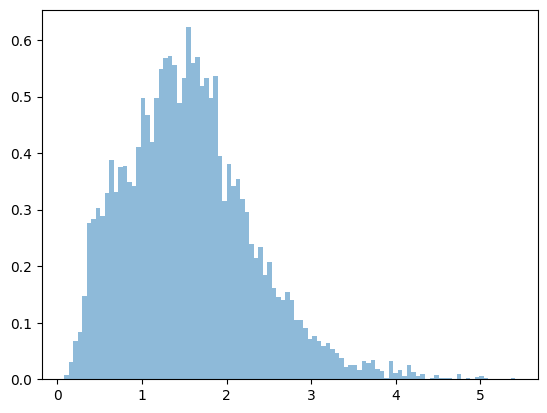

In [49]:
#istogramma dei redshift z
counts, bins = np.histogram(z, bins=int(np.sqrt(10000)), density=True)
plt.hist(z, bins=100, histtype='stepfilled', alpha=0.5, density=True)
plt.show()

### Rejection sampling

In [43]:
ymax = np.max(counts)
xmax = np.max(bins)
xmin = np.min(bins)

N=100000

x = np.random.uniform(xmin,xmax,N)
y = np.random.uniform(0,ymax,N)

bin_indices = np.digitize(x, bins) - 1  #np function to find in which bin a point is, result:array of indices that refers to the bin 
valid_points = y < counts[bin_indices]  #result:array of true, false boolean

xsample = x[valid_points]

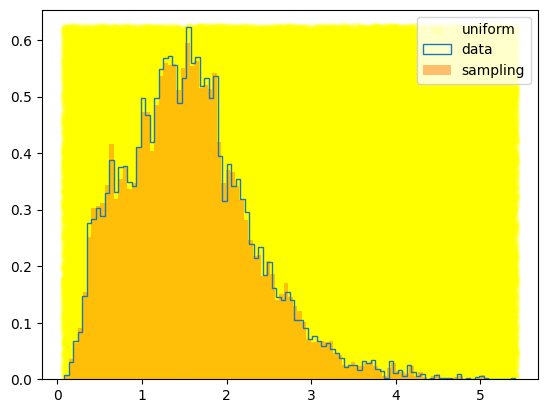

In [44]:
plt.scatter(x,y, color='yellow', alpha=0.1, label='uniform')
counts, bins = np.histogram(z, bins=int(np.sqrt(10000)), density=True)

plt.hist(z, bins=100, histtype='step', density=True, label='data')

plt.hist(xsample, bins=100, density=True, histtype='stepfilled',alpha=0.5, label='sampling')

plt.legend()
plt.show()

### Inverse Sampling

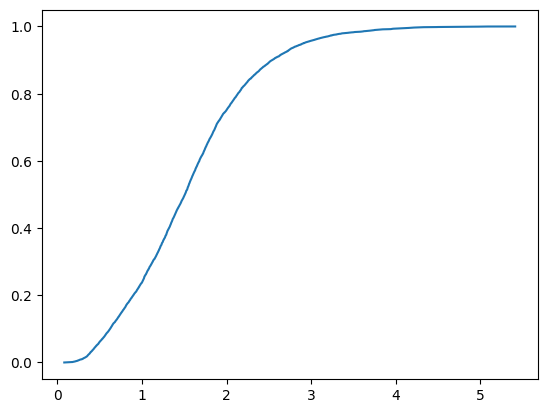

In [50]:
#cdf
z.sort()
p_cdf = np.linspace(0, 1, len(z))
plt.plot(z, p_cdf)

#oppure simple_cdf = np.cumsum(counts) / np.sum(counts)

plt.show()

## Rivedi questo (è giusto, ma capiscilo, in teoria stai invertendo la cdf?, hai copiato righe da gerry, anche le variabili nb)

In [52]:

bin_mids = (bins[1:] + bins[:-1]) / 2
# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.interp1d(p_cdf, z)

# sample evenly along the cumulative distribution, and interpolate
# little hack to make sure no points are generated outside interpolation range.
# not ideal
u = np.random.uniform(min(p_cdf),max(p_cdf), 10000) 
x_sample = tck(u)

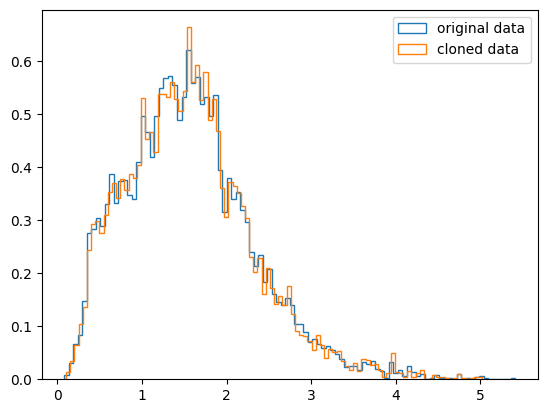

In [54]:
plt.hist(z,bins=100,histtype='step',density=True,label='original data')
plt.hist(x_sample, bins=100, density=True, histtype='step',label='cloned data')
plt.legend()
plt.show()

## La parte di cosmologia?

In [56]:
import astropy
astropy.cosmology.Planck18

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)